## Building ANN model using keras 
## Dataset - Churn Modelling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Data sets/Churn_Modelling.csv')

In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

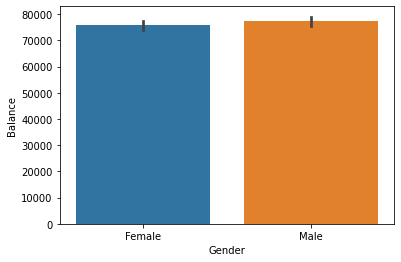

In [ ]:
sns.barplot(x='Gender',y='Balance',data=data)

In [ ]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
geography=pd.get_dummies(data['Geography'],drop_first=True)
gender=pd.get_dummies(data['Gender'],drop_first=True)

In [ ]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [ ]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [ ]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.drop(['Gender','Geography'],axis=1,inplace=True)

In [ ]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data=pd.concat([data,gender,geography],axis=1)

In [ ]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,1,0


In [ ]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Male', 'Germany',
       'Spain'],
      dtype='object')

In [ ]:
X=data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary','Male', 'Germany',
       'Spain']]

In [ ]:
y=data['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.91601335,
         1.75486502, -0.57369368],
       [-1.19119591, -0.94312892, -1.031415  , ..., -1.09168714,
        -0.5698444 , -0.57369368],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.91601335,
        -0.5698444 , -0.57369368],
       [-0.62420521, -0.08179119,  1.39076231, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       [-0.28401079,  0.87525072, -1.37744033, ..., -1.09168714,
         1.75486502, -0.57369368]])

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
model= Sequential()
model.add(Dense(units=6,activation='relu',input_dim=11,kernel_initializer='he_uniform'))
model.add(Dense(units=6,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(units=1,activation='sigmoid',kernel_initializer="glorot_uniform"))
model.compile(optimizer='Adamax',loss="binary_crossentropy",metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=10,nb_epoch=100,validation_split=0.33)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 151us/step - loss: 0.5617 - accuracy: 0.7824 - val_loss: 0.5229 - val_accuracy: 0.7955
Epoch 2/100
5359/5359 [==============================] - 1s 133us/step - loss: 0.5010 - accuracy: 0.7962 - val_loss: 0.4898 - val_accuracy: 0.7959
Epoch 3/100
5359/5359 [==============================] - 1s 137us/step - loss: 0.4739 - accuracy: 0.7972 - val_loss: 0.4710 - val_accuracy: 0.7982
Epoch 4/100
5359/5359 [==============================] - 1s 137us/step - loss: 0.4567 - accuracy: 0.7988 - val_loss: 0.4591 - val_accuracy: 0.7982
Epoch 5/100
5359/5359 [==============================] - 1s 136us/step - loss: 0.4447 - accuracy: 0.8001 - val_loss: 0.4498 - val_accuracy: 0.7944
Epoch 6/100
5359/5359 [==============================] - 1s 136us/step - loss: 0.4358 - accuracy: 0.8020 - val_loss: 0.4432 - val_accuracy: 0.7959
Epoch 7/100
5359/5359 [==============================] - 1s 142us/step

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ..., -1.09168714,
         1.75486502, -0.57369368],
       [-1.31490297,  0.10961719, -1.031415  , ..., -1.09168714,
        -0.5698444 , -0.57369368],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  0.91601335,
        -0.5698444 ,  1.74309049],
       [-0.00566991, -0.46460796, -0.33936434, ...,  0.91601335,
         1.75486502, -0.57369368],
       [-0.79945688, -0.84742473,  1.04473698, ...,  0.91601335,
         1.75486502, -0.57369368]])

In [ ]:
model.history.history

{'accuracy': [0.78242207,
  0.7962306,
  0.79716367,
  0.7988431,
  0.80014926,
  0.8020153,
  0.8046277,
  0.80742675,
  0.80835974,
  0.81433105,
  0.8160105,
  0.81731665,
  0.8201157,
  0.82366115,
  0.8286994,
  0.8300056,
  0.83616346,
  0.8391491,
  0.84381413,
  0.84530693,
  0.84661317,
  0.84586674,
  0.8477328,
  0.849972,
  0.8497854,
  0.8514648,
  0.8505318,
  0.8535175,
  0.8557567,
  0.85426384,
  0.85389066,
  0.8551969,
  0.8581825,
  0.8570629,
  0.85687625,
  0.85743606,
  0.8572495,
  0.8578093,
  0.8585557,
  0.8607949,
  0.8593021,
  0.8604217,
  0.8589289,
  0.86116815,
  0.8609815,
  0.8594887,
  0.8609815,
  0.8602351,
  0.8594887,
  0.8591155,
  0.8594887,
  0.8598619,
  0.8591155,
  0.8594887,
  0.8604217,
  0.8572495,
  0.8602351,
  0.86116815,
  0.8589289,
  0.8594887,
  0.8594887,
  0.8594887,
  0.8589289,
  0.8596753,
  0.86116815,
  0.8596753,
  0.86004853,
  0.8593021,
  0.8596753,
  0.8587423,
  0.86060834,
  0.8576227,
  0.8613547,
  0.8593021,
  0.8

In [ ]:
loss=pd.DataFrame(model.history.history['loss'])

In [ ]:
loss

,0
0,0.561732
1,0.500969
2,0.473883
3,0.456655
4,0.444713
...,...
95,0.329121
96,0.328964
97,0.329042
98,0.328663


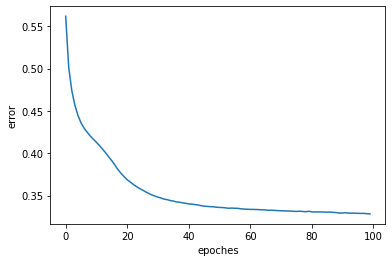

In [ ]:
plt.xlabel('epoches')
plt.ylabel('error')
plt.plot(loss)


In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ..., -1.09168714,
         1.75486502, -0.57369368],
       [-1.31490297,  0.10961719, -1.031415  , ..., -1.09168714,
        -0.5698444 , -0.57369368],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -1.09168714,
        -0.5698444 ,  1.74309049],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  0.91601335,
        -0.5698444 ,  1.74309049],
       [-0.00566991, -0.46460796, -0.33936434, ...,  0.91601335,
         1.75486502, -0.57369368],
       [-0.79945688, -0.84742473,  1.04473698, ...,  0.91601335,
         1.75486502, -0.57369368]])

In [ ]:
y_pred=model.predict(X_test)
y_pred=(y_pred > 0.5)

In [ ]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
1037    0
2899    0
9549    0
2740    0
6690    0
Name: Exited, Length: 2000, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[1498,   97],
       [ 189,  216]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
score = accuracy_score(y_pred,y_test)

In [ ]:
score

0.857